From Counts {('milk',): 4, ('bread',): 5, ('butter',): 5}
From Counts {('bread', 'milk'): 9, ('butter', 'milk'): 9, ('bread', 'butter'): 10}
From Counts {('bread', 'butter', 'milk'): 14}
[{('milk',): 4, ('bread',): 5, ('butter',): 5}, {('bread', 'milk'): 9, ('butter', 'milk'): 9, ('bread', 'butter'): 10}, {('bread', 'butter', 'milk'): 14}]

Frequent 1-itemsets:
('milk',): 4
('bread',): 5
('butter',): 5

Frequent 2-itemsets:
('bread', 'milk'): 9
('butter', 'milk'): 9
('bread', 'butter'): 10

Frequent 3-itemsets:
('bread', 'butter', 'milk'): 14


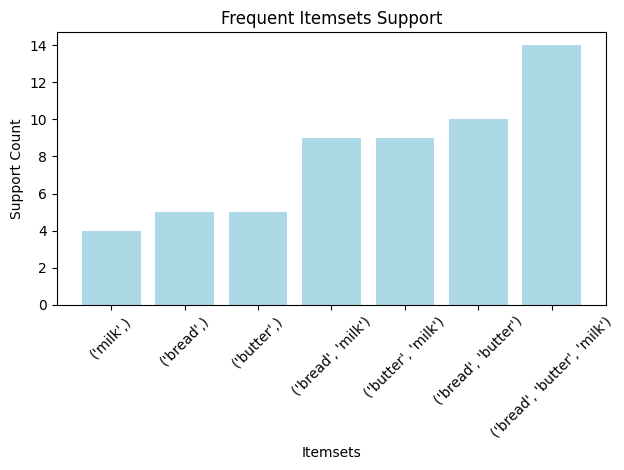

In [24]:
from itertools import combinations
import matplotlib.pyplot as plt

# Transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter']
]

min_support = 2

# Count how many transactions contain each itemset
def count_itemsets(candidates, transactions):
    counts = {}

    for itemset in candidates:
        count = 0  # Start count for this itemset
        for transaction in transactions:
            for item in itemset:
                if item in transaction:
            #if all(item in transaction for item in itemset):  # Check if all items are in transaction
                    count += 1
        # Convert itemset to a tuple (so it can be used as a dictionary key)
        counts[tuple(sorted(itemset))] = count
    print("From Counts",counts)
    return counts


# Apriori algorithm
def apriori(transactions, min_support):
    all_frequent = []
    items = set(item for t in transactions for item in t)
    k = 1
    current = [{item} for item in items]

    while current:
        counts = count_itemsets(current, transactions)
        frequent = {}  # Dictionary to store only frequent itemsets
        for itemset, count in counts.items():
            if count >= min_support:
                frequent[itemset] = count
        if not frequent:
            break
        all_frequent.append(frequent)
        # Prepare next level combinations
        unique_items = set()
        for itemset in frequent:
            for item in itemset:
                unique_items.add(item)
        
        # Generate all combinations of these items of length k+1
        current = []
        for combo in combinations(unique_items, k + 1):
            current.append(set(combo))

        k += 1
    print(all_frequent)
    return all_frequent

# Run Apriori
frequent_itemsets = apriori(transactions, min_support)

# Show results
for i, level in enumerate(frequent_itemsets, start=1):
    print(f"\nFrequent {i}-itemsets:")
    for itemset, count in level.items():
        print(f"{itemset}: {count}")

# Plot
labels = []
supports = []
for level in frequent_itemsets:
    for itemset, count in level.items():
        labels.append(str(itemset))
        supports.append(count)

plt.bar(labels, supports, color='lightblue')
plt.xticks(rotation=45)
plt.xlabel('Itemsets')
plt.ylabel('Support Count')
plt.title('Frequent Itemsets Support')
plt.tight_layout()
plt.show()

In [45]:
from itertools import combinations
import matplotlib.pyplot as plt

# Transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter']
]

min_support = 2

def count_itemset(candidate,transactions):
    counts = {}
    for itemset in candidate:
        count = 0;
        for transaction in transactions:
            for item in itemset:
                if item in transaction:
                    count += 1
        counts[(tuple(sorted(itemset)))] = count

    return counts

def aproiri(transactions, min_support):
    all_frequent = []
    items = set(item for t in transactions for item in t)
    k=1 
    current = [{item} for item in items]

    while current:
        counts = count_itemset(current, transactions)
        print(counts)
        frequent = {}
        for itemset, count in counts.items():
            if count >= min_support:
                frequent[itemset] = count
        if not frequent:
            break
        all_frequent.append(frequent)
        unique_items= set()
        for itemset in frequent:
            for item in itemset:
                unique_items.add(item)
        print(unique_items)
        current = []
        for combo in combinations(unique_items, k+1):
            current.append(set(combo))
        k+=1
        
        print(unique_items)
        return unique_items
aproiri(transactions, min_support)

                

{('milk',): 4, ('bread',): 5, ('butter',): 5}
{'milk', 'bread', 'butter'}
{'milk', 'bread', 'butter'}


{'bread', 'butter', 'milk'}

In [46]:
from itertools import combinations
import matplotlib.pyplot as plt

# Transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter']
]

min_support = 2

# ✅ Fixed counting logic (check full itemset in transaction)
def count_itemset(candidate, transactions):
    counts = {}
    for itemset in candidate:
        count = 0
        for transaction in transactions:
            if set(itemset).issubset(transaction):  # only change
                count += 1
        counts[(tuple(sorted(itemset)))] = count
    return counts

# ✅ Minimal fixes to your apriori function
def aproiri(transactions, min_support):
    all_frequent = []
    items = set(item for t in transactions for item in t)
    k = 1 
    current = [{item} for item in items]

    while current:
        counts = count_itemset(current, transactions)
        print(counts)

        frequent = {}
        for itemset, count in counts.items():  # ✅ fix: .items()
            if count >= min_support:           # ✅ fix: >= not >
                frequent[itemset] = count

        if not frequent:
            break

        all_frequent.append(frequent)

        unique_items = set()
        for itemset in frequent:
            for item in itemset:
                unique_items.add(item)

        print(unique_items)

        current = []
        for combo in combinations(unique_items, k + 1):
            current.append(set(combo))
        k += 1

    return all_frequent  # ✅ fix: return complete result

# Run it
frequent_itemsets = aproiri(transactions, min_support)
print("Frequent itemsets:", frequent_itemsets)


{('milk',): 4, ('bread',): 5, ('butter',): 5}
{'milk', 'bread', 'butter'}
{('bread', 'milk'): 3, ('butter', 'milk'): 3, ('bread', 'butter'): 4}
{'milk', 'bread', 'butter'}
{('bread', 'butter', 'milk'): 2}
{'milk', 'bread', 'butter'}
Frequent itemsets: [{('milk',): 4, ('bread',): 5, ('butter',): 5}, {('bread', 'milk'): 3, ('butter', 'milk'): 3, ('bread', 'butter'): 4}, {('bread', 'butter', 'milk'): 2}]
